# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 15th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Connor Gilmore

EID: CMG5829

Name: Jessie Lee

EID: JYL787

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [8]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        self.momentum = self.learning_rate * self.coef

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gama * self.cache + (1 - self.gama) * gradient**2
        denominator = np.sqrt(self.cache + self.eps)
        self.coef = self.coef - (self.learning_rate / denominator)*gradient
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.momentum = (self.momentum*self.mu) + (self.learning_rate * gradient)
        self.coef = self.coef - self.momentum
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = []
        coefs = []
        
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                yhat=self.linearPredict(X[i,:])
                error = yhat - y[i]
                # Compute gradients
                #gradient = (error * X) + (self.regularization * self.coef)
                gradient= np.dot(error,X[i,:])+ np.append(np.zeros((1,1)),np.dot(self.regularization, self.coef[1:]))
                
                # Update weights
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                if update_rule == 'rmsprop':
                    self.rmsprop(gradient)
   
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        x = np.zeros((X.shape[0], num_of_coefs))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
        
        return x
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        return X_features.dot(self.coef)

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

# Answer:

Momentum

Best Hyper parameter 1: (0.001, 0)
Best Hyper parameter 2: (0.001, 0.01)
[0.020195535187159188, 0.02020904002316665]


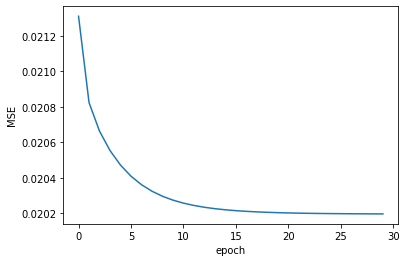

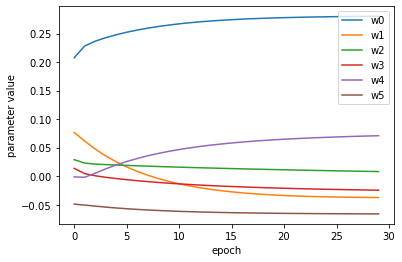

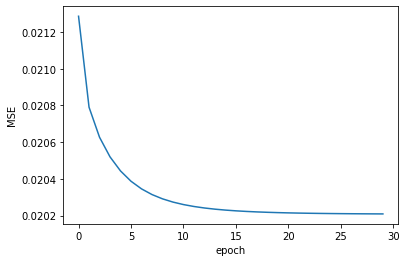

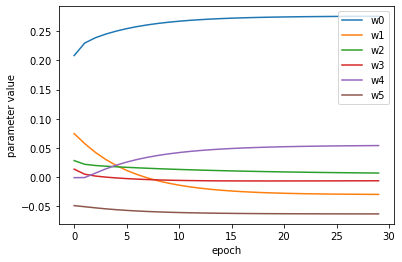

In [10]:
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    mom = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    mom.fit(X,y,plot=False)
    lowest_scores.append(mom.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
print("Best Hyper parameter 1:",hyper[chosen_hyper[0]])
print("Best Hyper parameter 2:",hyper[chosen_hyper[1]])
lowest_scores = []
for hyper_iter in chosen_hyper:
    mom = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    mom.fit(X,y,plot=True)
    lowest_scores.append(mom.lowest_mse)
print(lowest_scores)

RMSProp

Best Hyper parameter 1: (0.001, 0)
Best Hyper parameter 2: (0.001, 0.01)
[0.020203078865835295, 0.020215253592428473]


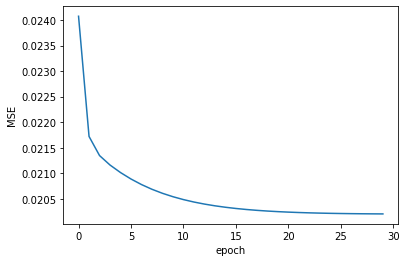

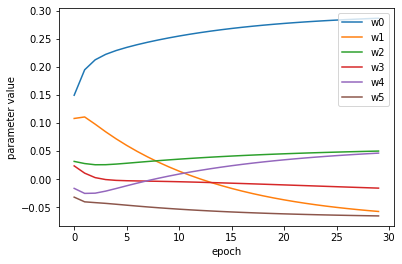

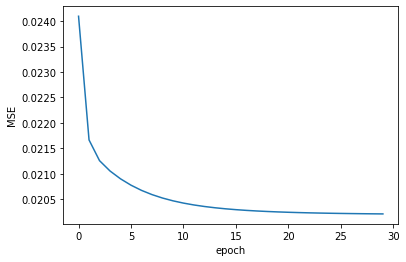

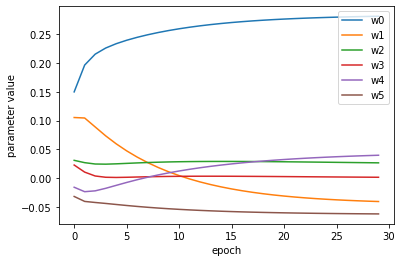

In [11]:
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    mom = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    mom.fit(X,y,plot=False, update_rule='rmsprop')
    lowest_scores.append(mom.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
print("Best Hyper parameter 1:",hyper[chosen_hyper[0]])
print("Best Hyper parameter 2:",hyper[chosen_hyper[1]])
lowest_scores = []
for hyper_iter in chosen_hyper:
    mom = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    mom.fit(X,y,plot=True, update_rule='rmsprop')
    lowest_scores.append(mom.lowest_mse)
print(lowest_scores)

**Observations**

It appears that the momentum approach is slightly better than the rmsprop method, judging by their respective MSE results. When looking at the parameter values (for the weights) across epochs, it appears that in the momentum method, the final values / the values where they plateau occur in earlier epochs than in the rmsprop method. This illustrates how, under the momentum method, the model converges earlier, while rmsprop takes a little longer due to moderate/diminish oscillations.

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

**a**

*Experiment using the Tanh activation function*:

* Train loss: 0.167
* Test loss: 0.175

*Experiment using the Linear activation function*:

* Train loss: 0.500
* Test loss: 0.501

*Qualitative Observations*:   

The experiment with the Tanh activation funtion shows a much more non-linear decision boundary that changes very rapidly in the early epochs. The Linear function's decision boundary is much more rigid and linear across epochs compared to the Tanh activation function. This may be because the Tanh activation function is a non-linear function that transforms the input data non-linearly and also because it's derivative is non-constant, so the gradient has a relationship with the x input data.

**b**

*Experiment using 4 neurons in the hidden layer*:

* Train loss: 0.031
* Test loss: 0.049

*Experiment using 4 neurons in the hidden layer*:

* Train loss: 0.006
* Test loss: 0.014

*Qualitative Observations*: 

As the number of neurons increased, the decision boundary more closely mirrored that of the organization of the ground truth classes. While both qualitatively appeared to do so very well, with eight neurons in the hidden layer, the neural network more closely mirrored some of the smaller nuances of the class boundaries. With more neurons, the neural network is better able to learn the patterns in the data that improves test and train loss rate. This can lead to a low bias, high variance case, as shown in the train and test loss data above.

**c**

*100 Epochs*

Learning Rate 10

* Train: 0.998
* Test: 0.975

Learning Rate 1

* Train: 0.007
* Test: 0.000

Learning Rate 0.1

* Train: 0.008
* Test: 0.008

Learning Rate 0.01

* Train: 0.082
* Test: 0.094

Learning Rate 0.001

* Train: 0.428
* Test: 0.432


*1000 Epochs* 

Learning Rate 10

* Train: 0.640
* Test: 0.624

Learning Rate 1

* Train: 0.000
* Test: 0.003

Learning Rate 0.1

* Train: 0.001
* Test: 0.001

Learning Rate 0.01

* Train: 0.136
* Test: 0.170

Learning Rate 0.001

* Train: 0.310
* Test: 0.306

*Qualitative Observations*: 

With respect to learning rate vs loss (regardless of number of epochs), there appears to be a parabolic / non-linear relationship. As the learning rate decreases from 10, the loss decreases (overall model improves), but as the learning rate increases from 0.1, the loss increases (overall model deteriorates). With respect to number of epochs vs loss, there appears to be a slight decreasese in loss (overall model improves). However, the same parabolic / non-linear relationship across learning rates is apparent in both epoch levels. The relationship is lower, however, at 1000 epochs. 

**d**

In [12]:
from IPython.display import Image

All runs are at 1000 epochs

*L2 Regularization (Regularization at 0.001) and 4 Neurons*

In [13]:
Image(filename='5d-l2-4n.png') 

FileNotFoundError: [Errno 2] No such file or directory: '5d-l2-4n.png'

*Polynomial Input Variables and 4 Neurons*

In [ ]:
Image(filename='5d-poly-4n.png') 

*sin() Input Variables*

In [ ]:
Image(filename='5d-sin.png') 

*Qualitative Observations*

We ran three experiments with the neural network model. The first experiment was L2 Regularization (Regularization at 0.001) and 4 neurons which resulted in a test loss of 0.018 and a train loss of 0.015. This indicates a model with a close balance of bias and variance. The second experiment was with the polynomial of the input variables in addition to the X1 and @2 variables and 4 neurons which resulted in a test loss of 0.021 and a train loss of 0.009. This indicates a model of high bias and low variance. Finally, the third experiment used the sin(X1) and sin(X2) input variables along with the X1 and X2 variables. This resulted in a test loss of 0.006 and a train loss of 0.002. This third experiment was the lowest across the three. What is interesting is that this model only used 2 neurons to obtain the lowest loss rates, but the other used 4 neurons. This can possibly be explained that the non-linear transformation of the two input variables (by taking the sin of them), helps to better model and predict the classes. This means that the additional neurons (using the non-linear tanh activation function) are not needed. Compared to the second experiment, which also inputed non-linear transformations of X1 and X2, the third experiment with the sin() transformations appears to better capture and model the classification, perhaps indicating X1 and X2 follow cyclical patterns. 

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [ ]:
# install pyod using pip first
!pip install pyod

In [ ]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [ ]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE
clf.fit(X_train)

In [ ]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# pyod.utils.data.evaluate_print(clf_name, y, y_pred)

# YOUR CODE SHOULD COME HERE
preds = clf.predict(X_test)
raw_outlier_scores = clf.decision_function(X_test)
evaluate_print(clf, y_test, preds)

In [ ]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
clf = MCD()
clf.fit(train_principalComponents)
train_preds = clf.predict(train_principalComponents)
test_preds = clf.predict(test_principalComponents)

#pyod.utils.example.visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

# YOUR CODE SHOULD COME HERE
visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, train_preds, test_preds)

In [ ]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE

CBLOF

In [ ]:
clf = CBLOF()
clf.fit(X_train)
preds = clf.predict(X_test)
raw_outlier_scores = clf.decision_function(X_test)
evaluate_print(clf, y_test, preds)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
clf = CBLOF()
clf.fit(train_principalComponents)
train_preds = clf.predict(train_principalComponents)
test_preds = clf.predict(test_principalComponents)

#pyod.utils.example.visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

# YOUR CODE SHOULD COME HERE
visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, train_preds, test_preds)

COPOD

In [ ]:
clf = COPOD()
clf.fit(X_train)
preds = clf.predict(X_test)
raw_outlier_scores = clf.decision_function(X_test)
evaluate_print(clf, y_test, preds)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
clf = COPOD()
clf.fit(train_principalComponents)
train_preds = clf.predict(train_principalComponents)
test_preds = clf.predict(test_principalComponents)

#pyod.utils.example.visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

# YOUR CODE SHOULD COME HERE
visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, train_preds, test_preds)

#### Observations

The three visuals above show that for the most part, the outlier classifiers perform well on the train set when predicting inliers, but for both the train and test sets, they tend to either miss outliers or mis-identify inliers as outliers. Across the models, the COPOD model performs the best on the PCA-transformed data as measured by the ROC. 

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

Combined Answer:

PCA is an unsupervised learning algorithm that reduces dimensionality in data. PCA reduces the number of variables (features) in a dataset without eliminating any of them, as the variables are compressed together.


N-dimensional data will result in NxN symetric covariance matrix where the diagnal is the variance of each dimension. The covariance matrix is found by multiplying the standardized matrix by the transpose of itself. 



$$\Sigma = \begin{bmatrix} cov(x_{1}x_{1}) & cov(x_{1}x_{2}) & cov(x_{1}x_{3}) ... & cov(x_{1}x_{n}) \\
  cov(x_{2}x_{1}) & cov(x_{2}x_{2}) & cov(x_{2}x_{3}) ... & cov(x_{2}x_{n}) \\
  cov(x_{3}x_{1}) & cov(x_{3}x_{2}) & cov(x_{3}x_{3}) ... & cov(x_{3}x_{n}) \\
  ...    &  ...   &  ...       & ...     \\
  cov(x_{n}x_{1}) & cov(x_{n}x_{2}) & cov(x_{n}x_{3}) ... & cov(x_{n}x_{n}) \end{bmatrix}$$
 
This covariance matrix needs to be decomposed to find eigenvectors and eigenvalues, where eigen vector are the vector that won't change direction when we multiply it with the covariance matrix. We find eigen values by solving the determinant of the marix:

$$det(\Sigma-\lambda\mathbb{1}) = 0  .........(1)  $$

where $\Sigma$ is the covariance matrix and, $\lambda$ is the eigenvalues and $\mathbb{1}$ is the identity matrix

Then what we need to do is to solve for each eigon vector $e_{i}$ by solving the function with respect each eigen factor determined from equation (1):

$$(\Sigma\ e_{i}-\lambda_{i}e_{i}) = 0$$


We find that the eigenvectors with the largest eigenvalues correspond to the dimensions that have the strongest correlation in the dataset, thus the maximum variance. The sorted (descending) eigenvectors are then used as weights to be multiplied to the original x values of the matrix. That is our principal component. PCA finds the best “subspace” that captures as much data variance as possible, to retain as much information as possible from the original dataset, where the dimention is reduced. 

As a result of transforming, the original n-dimensional data onto this new k-dimensional subspace (typically k ≪ n), the first principal component will have the largest possible variance, and all consequent principal components will have the largest variance given the constraint that these components are uncorrelated (orthogonal) to the other principal components — even if the input features are correlated, the resulting principal components will be mutually orthogonal (uncorrelated).




# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [ ]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()


a) **(2 pts)** Print the number of NaN values in each column.


In [ ]:
data.isna().sum()

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [ ]:
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']

In [ ]:
data_dm = data

In [ ]:
data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
one_hot = pd.get_dummies(data_dm['binned_yr_built'])
data_dm = data_dm.join(one_hot)


c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [ ]:
perc = 65
min_count =  int(((100-perc)/100)*data_dm.shape[0] + 1)
data_dm = data_dm.dropna(axis=1, thresh=min_count)


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
sample_mean = sample_ages.mean()

#Population mean
pop_mean = data['SalePrice'].mean()

In [ ]:
print('Sample Mean: ', round(sample_mean, 2))
print('Population Mean: ', round(pop_mean, 2))

e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [ ]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()
print(sample_mean)

#Get the critical Z value
z_critical = stats.norm.ppf(1-.05)

#Get population standard deviation
pop_stdev = data_dm['SalePrice'].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print('Confidence Interval: ', confidence_interval)
print('True Mean Value: ', data_dm['SalePrice'].mean())

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
    # compute z critical value
    z_critical = stats.norm.ppf(1-.05)

    # compute population standard deviation  
    pop_stdev = np.std(data_dm['SalePrice'])
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

*Interpretation*

The above plot illustrates what we can say about the confidence intervals: 95% of the time, the population mean falls within the confidence interval (where each vertical blue line is a confidence interval). We do see cases where the mean (the red line) falls outside of a confidence interval, but in the vast majority of cases, it falls within the confidence interval. This further illustrates the stability of statistical sampling to obtain an estimate and margin of error for each confidence interval. While the sample means and confidence intervals vary, we see that across 100 of them, they are relatively similar.